In [1]:
import pandas as pd
import numpy as np

from numpy import array

import matplotlib.pyplot as plt

import statsmodels.api as sm

In [73]:
training_data_name = "tiling"
# training_data_name = "chrv"

In [74]:
genome_df_chrV = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/chrV_ir_lstm_cn_tiling_post_smoothed_matched.csv")

In [75]:
# training_column_name_list = ["smooth_10.4bp_C02",
#                              "smooth_11bp_C02",
#                              "smooth_9bp_C02",
#                              "smooth_7bp_C02",
#                              "smooth_5bp_C02"]
training_column_name_list = ["smooth_10.4bp_cn_mean2"]

# model_identifier_list = ["smooth_104bp_C02",
#                          "smooth_11bp_C02",
#                          "smooth_9bp_C02", 
#                          "smooth_7bp_C02",
#                          "smooth_5bp_C02"]
model_identifier_list = ["smooth_104bp_cn_mean2"]

In [76]:
for i in range(len(training_column_name_list)):
    cur_avg_pred_df = pd.read_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/ir_lstm_{model_identifier_list[i]}_{training_data_name}_yeast_chrV_1bpresolution_subsequence50_predictions.csv")
    genome_df_chrV[f"{training_column_name_list[i]}_predictions"] = cur_avg_pred_df[f"{training_column_name_list[i]}_predictions"]
    cur_mean = genome_df_chrV[training_column_name_list[i]].mean()
    cur_std = genome_df_chrV[training_column_name_list[i]].std()
    genome_df_chrV[f"scale_adjusted_{training_column_name_list[i]}_predictions"] = (genome_df_chrV[f"{training_column_name_list[i]}_predictions"]*cur_std) + cur_mean
    genome_df_chrV[f"{training_column_name_list[i]}_norm"] = (genome_df_chrV[training_column_name_list[i]] - cur_mean)/cur_std

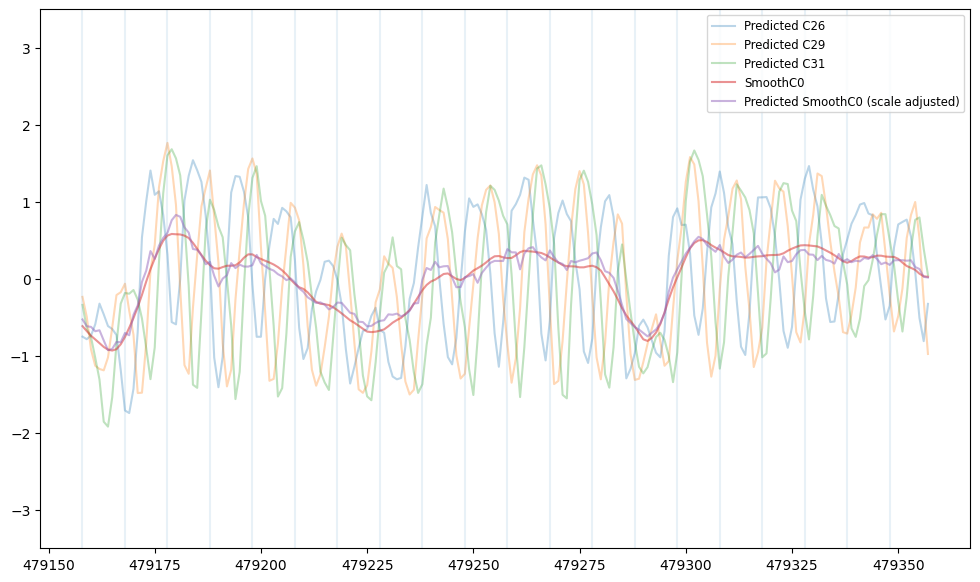

In [108]:
# sequence_length = 50
# sequence_length = 100
# sequence_length = 147
sequence_length = 200
# sequence_length = 2000

# starting_point = 0
# starting_point = 200
# starting_point = 34048
# starting_point = 62614 # Solid crazy region (sequence_length=200)
# starting_point = 107225 # Relatively flat
# starting_point = 112147 # Discrepancy between C31 and rest
# starting_point = 122424 # Discrepancy between C31 and rest
# starting_point = 158803 # Discrepancy bewteen C31 and rest
# starting_point = 192669 # Evidence of 5bp and 10bp periodicity? (sequence_length = 147)
# starting_point=  244776 # Interesting volatility
# starting_point = 277215 # 5bp periodicity
# starting_point = 313465 # Discrepancy between C31 and rest
# starting_point = 403190 # 5bp periodicity
# starting_point = 407586 # Discrepancy between all Cn
# starting_point = 428150 # High C0 values, 1bp volatility
# starting_point = 465270 # High C0 values, some 5bp periodicity
# starting_point = 465281 # somewhat abnormal 5bp periodicity
# starting_point = 469786 # mild 1bp volatility
# starting_point = 502770 # A High C0 value, 5bp periodicity
# starting_point = 522942 # One big peak
# starting_point = 560846 # 1bp volatility

# starting_point = 43747 # Discrepancy between all Cn
# starting_point = 175497 # Discrepancy between all Cn (in two locations)
# starting_point = 485265 # Discrepancy between all Cn

# starting_point = np.random.randint(genome_df_chrV.shape[0]-sequence_length)

# starting_point = 250691 # Region on Slides
starting_point = 479158 # Region for Paper?

alpha_val = 0.5
alpha_val_2 = 0.4
alpha_val_3 = 0.25

# ylims=[-3, 3]
ylims=[-3.5, 3.5]

plt.figure(figsize=(12,7))

plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["n=26"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", alpha=0.3, color="C0")
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["n=29"][range(starting_point, starting_point + sequence_length)], label="Predicted C29", alpha=0.3, color="C1")
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["n=31"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", alpha=0.3, color="C2")

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_10.4bp_C26"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", alpha=alpha_val)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_10.4bp_C29"][range(starting_point, starting_point + sequence_length)], label="Predicted C29", alpha=alpha_val)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_10.4bp_C31"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", alpha=alpha_val)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_10.4bp_C01"][range(starting_point, starting_point + sequence_length)], label="Calculated C0 (aa1)", alpha=alpha_val)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_10.4bp_C02"][range(starting_point, starting_point + sequence_length)], label="Calculated C0 (aa2)", alpha=alpha_val)

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_10.4bp_C02_predictions"][range(starting_point, starting_point + sequence_length)], label="Predicted C0 (aa2)", alpha=alpha_val, color="C3")

plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["smooth_10.4bp_cn_mean2"][range(starting_point, starting_point + sequence_length)], label="SmoothC0", alpha=alpha_val, color="C3")
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["scale_adjusted_smooth_10.4bp_cn_mean2_predictions"][range(starting_point, starting_point + sequence_length)], label="Predicted SmoothC0 (scale adjusted)", alpha=alpha_val, color="C4")


# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_10.4bp_cn_mean2_norm"][range(starting_point, starting_point + sequence_length)], label="SmoothC0 (normalized)", alpha=alpha_val, color="C3")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_10.4bp_cn_mean2_predictions"][range(starting_point, starting_point + sequence_length)], label="Predicted SmoothC0", alpha=alpha_val, color="C4")


plt.vlines(list(range(starting_point, starting_point+sequence_length, 10)), ylims[0], ylims[1], alpha=0.1)
# plt.title("Predictions on ChrV, 10.4bp Smoothing")
plt.legend(fontsize="small")
plt.ylim(ylims)
plt.show()

In [20]:
# plt.figure(figsize=(12,7))

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_11bp_C26"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", alpha=alpha_val)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_11bp_C29"][range(starting_point, starting_point + sequence_length)], label="Predicted C29", alpha=alpha_val)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_11bp_C31"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", alpha=alpha_val)
# # plt.plot(list(range(starting_point, starting_point + sequence_length)),
# #          genome_df_chrV["smooth_11bp_C01"][range(starting_point, starting_point + sequence_length)], label="Calculated C0 (aa1)", alpha=alpha_val)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_11bp_C02"][range(starting_point, starting_point + sequence_length)], label="Calculated C0 (aa2)", alpha=alpha_val)

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_11bp_C02_predictions"][range(starting_point, starting_point + sequence_length)], label="Predicted C0 (aa2)", alpha=alpha_val)

# plt.vlines(list(range(starting_point, starting_point+sequence_length, 10)), ylims[0], ylims[1], alpha=0.1)
# plt.title("Predictions on ChrV, 11bp Smoothing")
# plt.legend(fontsize="small")
# plt.ylim(ylims)
# plt.show()

In [83]:
genome_df_chrV_aligned = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/yeast_chrV_nucleosome_alignment_window_size200.csv")

In [84]:
# genome_df_chrV_aligned["n=26"] = genome_df_chrV.loc[genome_df_chrV_aligned["position"], "n=26"].values
# genome_df_chrV_aligned["n=29"] = genome_df_chrV.loc[genome_df_chrV_aligned["position"], "n=29"].values
# genome_df_chrV_aligned["n=31"] = genome_df_chrV.loc[genome_df_chrV_aligned["position"], "n=31"].values
# genome_df_chrV_aligned["C0"] = genome_df_chrV.loc[genome_df_chrV_aligned["position"], "C0"].values

In [85]:
genome_df_chrV_aligned = pd.concat([genome_df_chrV_aligned, genome_df_chrV.loc[genome_df_chrV_aligned["position"]].reset_index()], axis=1)

In [86]:
genome_df_chrV_aligned

,sequence,distance_to_nucleosome,chrID,nucleosome_center,position,index,sequence,chrID,position,n=26,...,smooth_10.7bp_C26,smooth_10.7bp_C29,smooth_10.7bp_C31,smooth_10.7bp_C01,smooth_10.7bp_C02,smooth_10.7bp_cn_mean,smooth_10.7bp_cn_mean2,smooth_10.4bp_cn_mean2_predictions,scale_adjusted_smooth_10.4bp_cn_mean2_predictions,smooth_10.4bp_cn_mean2_norm
0,CCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTT...,-200,chrV,233,8,8,CCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTT...,chrV,8,-0.194927,...,-0.438896,-0.358690,-0.334797,-0.387700,-0.397451,-0.377461,-0.386847,-0.432234,-0.284532,-0.592163
1,CAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTA...,-199,chrV,233,9,9,CAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTA...,chrV,9,-0.277341,...,-0.479238,-0.336775,-0.279560,-0.380268,-0.398997,-0.365191,-0.379399,-0.451001,-0.296640,-0.578687
2,AAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTAC...,-198,chrV,233,10,10,AAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTAC...,chrV,10,-0.320842,...,-0.486659,-0.338733,-0.238896,-0.361909,-0.385215,-0.354763,-0.362778,-0.385806,-0.254577,-0.553419
3,AGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACT...,-197,chrV,233,11,11,AGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACT...,chrV,11,-0.424420,...,-0.452233,-0.376374,-0.209710,-0.325467,-0.348439,-0.346106,-0.330972,-0.415502,-0.273736,-0.508270
4,GCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACTA...,-196,chrV,233,12,12,GCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACTA...,chrV,12,-0.619899,...,-0.384817,-0.405665,-0.210134,-0.288414,-0.305134,-0.333539,-0.297475,-0.353216,-0.233550,-0.454628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276795,AAGGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACA...,195,chrV,576556,576726,576726,AAGGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACA...,chrV,576726,-0.364871,...,-0.408208,-0.113362,-0.128881,-0.276211,-0.302191,-0.216817,-0.268545,-0.345753,-0.228735,-0.424556
1276796,AGGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAG...,196,chrV,576556,576727,576727,AGGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAG...,chrV,576727,-0.345943,...,-0.453858,-0.203804,-0.193159,-0.328967,-0.353272,-0.283607,-0.323508,-0.399195,-0.263215,-0.506482
1276797,GGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAGG...,197,chrV,576556,576728,576728,GGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAGG...,chrV,576728,-0.175286,...,-0.456713,-0.277291,-0.252242,-0.357631,-0.376733,-0.328749,-0.354478,-0.436677,-0.287398,-0.545158
1276798,GTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAGGG...,198,chrV,576556,576729,576729,GTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAGGG...,chrV,576729,-0.220960,...,-0.445810,-0.309513,-0.282632,-0.366273,-0.381533,-0.345985,-0.364221,-0.458083,-0.301209,-0.557220


In [87]:
genome_df_chrV_dist_nuc_grouped = genome_df_chrV_aligned.groupby("distance_to_nucleosome").mean(numeric_only=True)

In [88]:
xlims_aligned=[-200, 200]
ylims_aligned2=[-0.1, 0.125]
alpha_val_aligned = 0.5

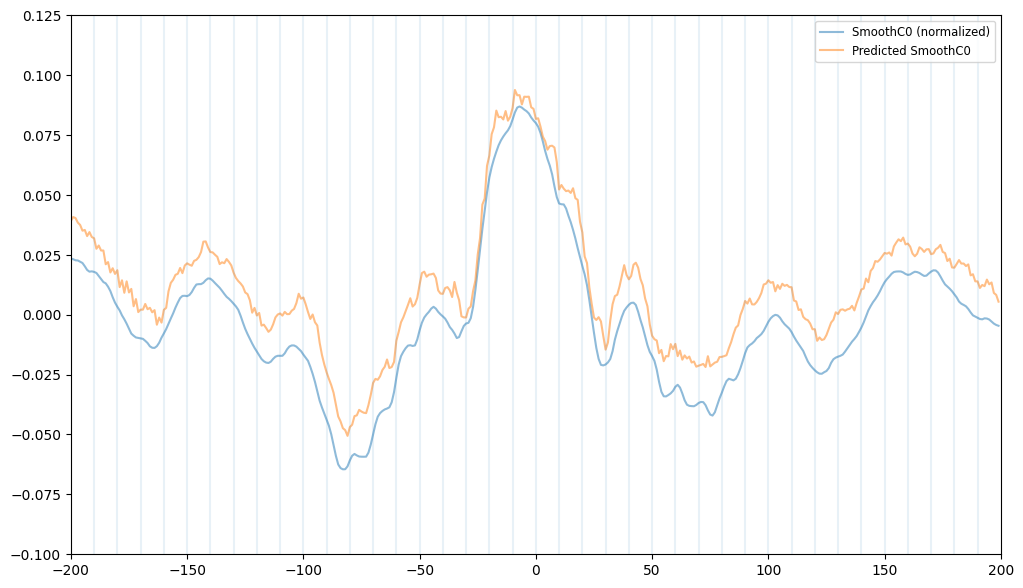

In [109]:
plt.figure(figsize=(12,7))

# plt.plot(genome_df_chrV_dist_nuc_grouped["smooth_10.4bp_C02"], label="Calculated C0 (aa2)", alpha=alpha_val_aligned)

# plt.plot(genome_df_chrV_dist_nuc_grouped["smooth_10.4bp_C02_predictions"], label="Predicted C0 (aa2)", alpha=alpha_val_aligned)

# plt.plot(genome_df_chrV_dist_nuc_grouped["smooth_10.4bp_cn_mean2"], label="SmoothC0", alpha=alpha_val_aligned)
# plt.plot(genome_df_chrV_dist_nuc_grouped["scale_adjusted_smooth_10.4bp_cn_mean2_predictions"], label="Predicted SmoothC0 (scale adjusted)", alpha=alpha_val_aligned)

plt.plot(genome_df_chrV_dist_nuc_grouped["smooth_10.4bp_cn_mean2_norm"], label="SmoothC0 (normalized)", alpha=alpha_val_aligned)
plt.plot(genome_df_chrV_dist_nuc_grouped["smooth_10.4bp_cn_mean2_predictions"], label="Predicted SmoothC0", alpha=alpha_val_aligned)

# plt.vlines([-74, 73], ylims[0], ylims[1], color="red", alpha=0.2, label="Outer Nucleosome endpoints")
# plt.vlines([-49, 48], ylims[0], ylims[1], color="red", alpha=0.3, label="Inner Nucleosome endpoints")

plt.vlines([i*10 for i in list(range(-20, 20))], ylims[0], ylims[1], alpha=0.1)

# plt.title("ChrV Aligned at Nucleosome Centers, 10.4bp Smoothing")
plt.legend(fontsize="small")
plt.xlim(xlims_aligned)
plt.ylim(ylims_aligned2)
plt.show()

In [7]:
# plt.figure(figsize=(12,7))

# # plt.plot(genome_df_chrV_dist_nuc_grouped["smooth_11bp_C02"], label="Calculated C0 (aa2)", alpha=alpha_val_aligned)

# plt.plot(genome_df_chrV_dist_nuc_grouped["smooth_11bp_C02_predictions"], label="Predicted C0 (aa2)", alpha=alpha_val_aligned)

# plt.vlines([-74, 73], ylims[0], ylims[1], color="red", alpha=0.2, label="Outer Nucleosome endpoints")
# plt.vlines([-49, 48], ylims[0], ylims[1], color="red", alpha=0.3, label="Inner Nucleosome endpoints")

# plt.vlines([i*10 for i in list(range(-20, 20))], ylims[0], ylims[1], alpha=0.1)

# plt.title("ChrV Aligned at Nucleosome Centers, 11bp Smoothing")
# plt.legend(fontsize="small")
# plt.xlim(xlims_aligned)
# plt.ylim(ylims_aligned2)
# plt.show()

In [12]:
genome_df_chrV_matched = genome_df_chrV.loc[genome_df_chrV["C26_raw"].notna()].reset_index(drop=True)
genome_df_chrV_matched = genome_df_chrV_matched.loc[genome_df_chrV_matched["smooth_10.4bp_C26"].notna()].reset_index(drop=True)

In [14]:
genome_df_chrV_matched.columns

Index(['sequence', 'chrID', 'position', 'n=26', 'n=29', 'n=31', 'C0',
       'C0_orig', 'C26_raw', 'C29_raw', 'C31_raw', 'smooth_3bp_C26',
       'smooth_3bp_C26.1', 'smooth_3bp_C29', 'smooth_3bp_C29.1',
       'smooth_3bp_C31', 'smooth_3bp_C31.1', 'smooth_3bp_C01',
       'smooth_3bp_C02', 'smooth_5bp_C26', 'smooth_5bp_C26.1',
       'smooth_5bp_C29', 'smooth_5bp_C29.1', 'smooth_5bp_C31',
       'smooth_5bp_C31.1', 'smooth_5bp_C01', 'smooth_5bp_C02',
       'smooth_7bp_C26', 'smooth_7bp_C26.1', 'smooth_7bp_C29',
       'smooth_7bp_C29.1', 'smooth_7bp_C31', 'smooth_7bp_C31.1',
       'smooth_7bp_C01', 'smooth_7bp_C02', 'smooth_9bp_C26',
       'smooth_9bp_C26.1', 'smooth_9bp_C29', 'smooth_9bp_C29.1',
       'smooth_9bp_C31', 'smooth_9bp_C31.1', 'smooth_9bp_C01',
       'smooth_9bp_C02', 'smooth_11bp_C26', 'smooth_11bp_C26.1',
       'smooth_11bp_C29', 'smooth_11bp_C29.1', 'smooth_11bp_C31',
       'smooth_11bp_C31.1', 'smooth_11bp_C01', 'smooth_11bp_C02',
       'smooth_10.4bp_C26', 's

In [15]:
genome_df_chrV_matched = genome_df_chrV_matched[["sequence", "chrID", "position", "n=26", "n=29", "n=31", "C0", "C0_orig", "C26_raw", "C29_raw", "C31_raw", 
                                                 'smooth_10.4bp_cn_mean2_predictions']]

In [16]:
genome_df_chrV_matched.to_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/cycle6_ir_lstm_cn_tiling_post_smoothed_matched_predictions.csv", index=False)